In [1]:
from getdist import plots, MCSamples, loadMCSamples
import getdist
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('text', usetex=True)

In [4]:
class analyse_chains():
    def __init__(self, TATT_fit = False, pert_type = 'physical'):
        self.is_TATT_fit = TATT_fit
        self.pert_type = pert_type
        super().__init__()
        
    def add_S8(self, chains_to_change):
        """ Creates S8 parameter in the chain desired
        """
        for ch in chains_to_change:
            ch.addDerived(np.sqrt(ch['Omega_m']/0.3)*ch['sigma8'], name='S8', label='S8')
        return chains_to_change
    
    def get_means_err_chi2(self, chains_to_extract):
        """ To get the mean, error and minimum chi squared of your interested parameter in the chain.
        """
        
        par_dim = len(chains_to_extract)
        
        if self.is_TATT_fit:
            chmeans = np.zeros((par_dim,6))
            chstd = np.zeros((par_dim,6))
            min_chi2s_idx = np.zeros((par_dim))
            min_chi2s = np.zeros((par_dim))
            best_fit = []
            for ich, ch in enumerate(chains_to_extract):
                chmeans[ich] = ch.getMeans(pars = [0,1, 2, 3,4,5])   
                chstd[ich] = ch.std([0,1,2,3,4,5])
                best_fit.append(ch.getParamSampleDict(np.argmin(ch.getParams().chi2), want_derived=True))
                min_chi2s[ich] = np.min(ch.getParams().chi2)
        else:
            chmeans = np.zeros((par_dim,4))
            chstd = np.zeros((par_dim,4))
            min_chi2s_idx = np.zeros((par_dim))
            best_fit = []
            min_chi2s = np.zeros((par_dim)) 
            for ich, ch in enumerate(chains_to_extract):
                chmeans[ich] = ch.getMeans(pars = [0,1,2,3])   
                chstd[ich] = ch.std([0,1,2, 3])
                min_chi2s[ich] = np.min(ch.getParams().chi2)
        return chmeans, chstd, min_chi2s_idx,min_chi2s, best_fit
    
    def unpack_chains(self, param = None):
        path_to_chains = '/mnt/zfsusers/anyabua/IA/mcmc/chains/'
        if not self.is_TATT_fit and self.pert_type == 'physical': 
            if param == 'amp':
                amplabel = np.array(['1', '075', '050', '025', '0', '025', '050', '075', '1'])
                sign = np.array([-1, -1, -1, -1,0, 1, 1, 1, 1])
                chains = []
                for sa, a in zip(sign, amplabel):
                    if sa < 0:
                        chains.append(loadMCSamples(path_to_chains + f"FIDRES/AMP_NEG0P{a}_PHYSPERT/AMP_NEG0P{a}_PHYSPERT", 
                                                    settings={'ignore_rows': 0.3}))

                    if  sa == 0:
                        chains.append(loadMCSamples(path_to_chains + f"FIDRES/AMP_0_PHYSPERT/AMP_0_PHYSPERT", 
                                                    settings={'ignore_rows': 0.3}))
                    if sa > 0: 
                        chains.append(loadMCSamples(path_to_chains + f"FIDRES/AMP_POS0P{a}_PHYSPERT/AMP_POS0P{a}_PHYSPERT", 
                                                    settings={'ignore_rows': 0.3}))
                return self.add_S8(chains)
            
            if param == 'amp_break':
                amplabel = np.array(['95', '90', '85', '80', '75' ,'70', '65', '60', '55', '50', '45', '40', '35', '30', '25', '20', '15', '10', '050', '0', '050','10', '15', '20', '25', '30', '35', '40', '45', '50', '55', '60', '65', '70', '75', '80', '85', '90', '95'])
                sign = np.array([-1, -1, -1, -1, -1, -1, -1,-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1 ,0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])   
                chains = []
                for sa, a in zip(sign, amplabel):
                    if sa < 0:
                        chains.append(loadMCSamples(path_to_chains + f"AMP_NEG0P{a}_PHYSPERT/AMP_NEG0P{a}_PHYSPERT", 
                                                    settings={'ignore_rows': 0.3}))
                    if  sa == 0:
                        chains.append(loadMCSamples(path_to_chains + f"AMP_0_PHYSPERT/AMP_0_PHYSPERT", 
                                                    settings={'ignore_rows': 0.3}))
                    if sa > 0: 
                        chains.append(loadMCSamples(path_to_chains + f"AMP_POS0P{a}_PHYSPERT/AMP_POS0P{a}_PHYSPERT", 
                                                    settings={'ignore_rows': 0.3}))
                return self.add_S8(chains)
                
            if param == 'deltak':
                deltaks = np.arange(1,10,2)
                chains = []
                for dk in deltaks:
                    chains.append(loadMCSamples(path_to_chains + f"FIDRES/DELTAK_{dk}_PHYSPERT/DELTAK_{dk}_PHYSPERT", 
                                               settings={'ignore_rows': 0.3}))
                return self.add_S8(chains)
                
            if param == 'kpivot':
                kpivots = np.arange(0.1,1.1, 0.1)
                chains = []
                for ik, k in enumerate(kpivots):
                    if k == 1.0:
                        chains.append(loadMCSamples(path_to_chains + f"FIDRES/KPIVOT_1P0_PHYSPERT/KPIVOT_1P0_PHYSPERT", 
                                                    settings={'ignore_rows': 0.3}))
                    else:
                        chains.append(loadMCSamples(path_to_chains + f"FIDRES/KPIVOT_0P{ik+1}_PHYSPERT/KPIVOT_0P{ik+1}_PHYSPERT", 
                                                    settings={'ignore_rows': 0.3}))
                return self.add_S8(chains)
            
        if not self.is_TATT_fit and self.pert_type == 'gaussian':
            num_data = 10
            chains10 = []
            chains5 = []
            chains2 = []
            chains1 = []
            for dg in range(num_data):
                chains10.append(loadMCSamples(path_to_chains + f"10percDG{dg}/10percDG{dg}", settings={'ignore_rows': 0.3}))
                chains5.append(loadMCSamples(path_to_chains + f"5percDG{dg}/5percDG{dg}", settings = {'ignore_rows': 0.3}))
                chains2.append(loadMCSamples(path_to_chains + f"2percDG{dg}/2percDG{dg}", settings = {'ignore_rows': 0.3}))
                chains1.append(loadMCSamples(path_to_chains + f"1percDG{dg}/1percDG{dg}", settings = {'ignore_rows': 0.3}))
            return self.add_S8(chains10), self.add_S8(chains5), self.add_S8(chains2), self.add_S8(chains1)
                       
        if not self.is_TATT_fit and self.pert_type == 'AIA_2 gaussian':
            num_data = 10
            chains10 = []
            chains5 = []
            chains2 = []
            chains1 = []
            for dg in range(num_data):
                chains10.append(loadMCSamples(path_to_chains + f"AIA2_AMP_10PERC_GAUSS{dg}/AIA2_AMP_10PERC_GAUSS{dg}", settings={'ignore_rows': 0.3}))
                chains5.append(loadMCSamples(path_to_chains + f"AIA2_AMP_5PERC_GAUSS{dg}/AIA2_AMP_5PERC_GAUSS{dg}", settings = {'ignore_rows': 0.3}))
                #chains5.append(loadMCSamples(path_to_chains + f"GP_AMP_5PERC_{dg}/GP_AMP_5PERC_{dg}", settings = {'ignore_rows': 0.3}))
                chains2.append(loadMCSamples(path_to_chains + f"AIA2_AMP_2PERC_GAUSS{dg}/AIA2_AMP_2PERC_GAUSS{dg}", settings = {'ignore_rows': 0.3}))
                chains1.append(loadMCSamples(path_to_chains + f"AIA2_AMP_1PERC_GAUSS{dg}/AIA2_AMP_1PERC_GAUSS{dg}", settings = {'ignore_rows': 0.3}))
            return self.add_S8(chains10), self.add_S8(chains5), self.add_S8(chains2), self.add_S8(chains1)

        if not self.is_TATT_fit and self.pert_type == 'halo model':
            chains = [] 
            chains.append(loadMCSamples(path_to_chains + "NLA10PERC_HALOMOD/NLA10PERC_HALOMOD", settings={'ignore_rows': 0.3}))
            return self.add_S8(chains)

        if self.is_TATT_fit and self.pert_type == 'physical':
            if param == 'amp':
                amplabel = np.array(['1','075', '050', '025', '0', '025', '050', '075', '1'])
                sign = np.array([-1,-1, -1, -1,0, 1, 1, 1,1])
                chains = []
                for sa, a in zip(sign, amplabel):
                    if sa < 0:
                        chains.append(loadMCSamples(path_to_chains + f"TATTFIT_TO_PHYSPERT/TATTAMP_NEG0P{a}_PHYSPERT/TATTAMP_NEG0P{a}_PHYSPERT", 
                                                    settings={'ignore_rows': 0.3}))
                    if sa == 0:
                        chains.append(loadMCSamples(path_to_chains + f"TATTFIT_TO_PHYSPERT/TATTAMP_0_PHYSPERT/TATTAMP_0_PHYSPERT", 
                                                    settings={'ignore_rows': 0.3}))
                    if sa > 0: 
                        chains.append(loadMCSamples(path_to_chains + f"TATTFIT_TO_PHYSPERT/TATTAMP_POS0P{a}_PHYSPERT/TATTAMP_POS0P{a}_PHYSPERT", 
                                                    settings={'ignore_rows': 0.3}))
                return self.add_S8(chains)
            
        if not self.is_TATT_fit and self.pert_type == 'AIA_2_physical':
            if param == 'amp':
                amplabel = np.array(['10', '075', '050', '025', '0', '025', '050', '075', '10'])
                sign = np.array([-1, -1, -1, -1,0, 1, 1, 1, 1])
                chains = []
                for sa, a in zip(sign, amplabel):
                    if sa < 0:
                        chains.append(loadMCSamples(path_to_chains + f"AIA2_AMP_NEG0P{a}_PHYSPERT/AIA2_AMP_NEG0P{a}_PHYSPERT", 
                                                    settings={'ignore_rows': 0.3}))
                    if sa == 0:
                        chains.append(loadMCSamples(path_to_chains + f"AIA2_AMP_0_PHYSPERT/AIA2_AMP_0_PHYSPERT", 
                                                    settings={'ignore_rows': 0.3}))
                    if sa > 0: 
                        chains.append(loadMCSamples(path_to_chains + f"AIA2_AMP_POS0P{a}_PHYSPERT/AIA2_AMP_POS0P{a}_PHYSPERT", 
                                                    settings={'ignore_rows': 0.3}))
                return self.add_S8(chains)

        if self.is_TATT_fit and self.pert_type == 'gaussian':
            num_data = 10
            chains10_t = []
            chains5_t = []
            chains2_t = []
            chains1_t = []
            for dg in range(num_data):
                chains10_t.append(loadMCSamples(path_to_chains + f"DataGen10Perc{dg}/DataGen10Perc{dg}", settings={'ignore_rows': 0.3}))
                chains5_t.append(loadMCSamples(path_to_chains + f"DataGen5Perc{dg}/DataGen5Perc{dg}", settings = {'ignore_rows': 0.3}))
                chains2_t.append(loadMCSamples(path_to_chains + f"DataGen2Perc{dg}/DataGen2Perc{dg}", settings = {'ignore_rows': 0.3}))
                chains1_t.append(loadMCSamples(path_to_chains + f"DataGen1Perc{dg}/DataGen1Perc{dg}", settings = {'ignore_rows': 0.3}))
            return self.add_S8(chains10_t), self.add_S8(chains5_t), self.add_S8(chains2_t), self.add_S8(chains1_t)
        
        if self.is_TATT_fit and self.pert_type == 'halo model':
            chains = []
            chains.append(loadMCSamples(path_to_chains + f"TATT10PERC_HALOMOD/TATT10PERC_HALOMOD", settings={'ignore_rows': 0.3}))
            return self.add_S8(chains)
            
    def delta_param_over_sigma(self, chain_param, true_val, err, return_error=False):
        if self.pert_type ==  'gaussian' or self.pert_type == 'AIA_2 gaussian':
            delta_param = np.mean(np.fabs(chain_param - true_val))
            mean_err = np.mean(np.fabs(err))
            if return_error:
                delta_param_std = np.sqrt(np.mean(np.fabs(chain_param - true_val)**2))
                return delta_param/mean_err, delta_param_std/mean_err
            return delta_param/mean_err
        else:
            delta_param = np.fabs(chain_param - true_val)
            return delta_param/err

            
    def _plot_chains(self,cosmo_params = True, vary_param = 'amp'):
        sigma8 = 0.81
        omM = 0.30
        S8 = np.sqrt(omM/0.3)*sigma8
        ticksize = 6
        a_1 = 1.0
        a_d = 0.0
        a_2 = 0.0
        etaIa = 0.3
       
        if self.is_TATT_fit: 
            if cosmo_params:
                pairs = {'\Omega_M': (omM, 0, r'$\frac{\Delta \Omega_{M}}{\sigma_{\Omega_{M}}}$', 'D','blue'),
                         'S_8': (S8, 5, r'$\frac{\Delta S_{8}}{\sigma_{S_{8}}}$', '^', 'magenta')}
            else:
                pairs = {'A_1': (a_1, 1, r'$\frac{\Delta A_{1}}{\sigma_{A_{1}}}$', 'o','red'),
                         'A_2': (a_2, 2, r'$\frac{\Delta A_{2}}{\sigma_{A_{2}}}$','s', 'yellowgreen'), 
                         'A_d': (a_d, 3, r'$\frac{\Delta A_{d}}{\sigma_{A_{d}}}$', '>', 'darkorange'),
                         '\eta_{IA}': (etaIa, 4, r'$\frac{\Delta \eta_{IA}}{\sigma_{\eta_{IA}}}$', 'X', 'mediumslateblue')}
                
        if not self.is_TATT_fit:
            if cosmo_params:
                pairs = {'\Omega_M': (omM, 0, r'$\frac{\Delta \Omega_{M}}{\sigma_{\Omega_{M}}}$','D','blue') , 
                         'S_8': (S8, 3, r'$\frac{\Delta S_{8}}{\sigma_{S_{8}}}$','^', 'magenta')}
            else:
                pairs = {'A_1': (a_1, 1, r'$\frac{\Delta A_{1}}{\sigma_{A_{1}}}$','o','red') , 
                         '\eta_{IA}': (etaIa, 2, r'$\frac{\Delta \eta_{IA}}{\sigma_{\eta_{IA}}}$', 'X', 'mediumslateblue')}
                
                
                
        if self.pert_type == 'physical' or self.pert_type == 'AIA_2_physical':
            if vary_param == 'deltak':
                label = r'$k_p=0.3\,{\rm Mpc}^{-1},\,\,$'r'$A_{\rm res}= 0.1$'
                x = np.arange(1,10,2)
                xlab = r'$\Delta\,k\,\,[{\rm Mpc}^{-1}]$'
            if vary_param == 'amp_break':
                label = r'$k_p=0.3\,{\rm Mpc}^{-1},\,\Delta k=0.11\,{\rm Mpc}^{-1}$'
                x = np.arange(-0.95, 1.0, 0.05)                   
                xlab =  r'$A_{\rm res}$'
            if vary_param == 'kpivot':
                label = r'$A_{\rm res} = 0.1,\,\,$'r'$\Delta k=0.11\,{\rm Mpc}^{-1}$'
                x = np.arange(0.1,1.1, 0.1)
                xlab = r'$k_p\,\,[{\rm Mpc}^{-1}]$'
            if vary_param == 'amp':
                label = r'$k_p=0.3\,{\rm Mpc}^{-1},\,\Delta k=0.11\,{\rm Mpc}^{-1}$'
                x = np.arange(-0.1, 0.125, 0.025)                
                xlab = r'$A_{\rm res}$'
                
          
            mainchain = self.unpack_chains(param = vary_param)
            chmeans, chstd, min_chi2s_idx,min_chi2s, best_fit = self.get_means_err_chi2(mainchain)

            figpp = plt.figure(figsize=(10, 8))
            gsp = plt.GridSpec(nrows=2, ncols=1, height_ratios=[2, 1])
            gsp.update(hspace=0.08)
            ax1 = figpp.add_subplot(gsp[0, 0])
            
            ax1.set_title(label, fontsize = 20)  
            ax2 = figpp.add_subplot(gsp[1, 0])
            plt.setp(ax1.get_xticklabels(), visible=False)
            
            ax2.plot(x, min_chi2s,'x', color = 'green', label = '${\rm NLA}$')
            print(min_chi2s)
            
            ax2.set_ylabel(r'$\chi^{2}_{\rm min}$', fontsize = 28)
            ax2.set_xlabel(xlab, fontsize = 22)
            ax2.tick_params(axis='both', which='major', labelsize = 18, size = ticksize)
            if vary_param == 'deltak':
                ax1.set_xticks(x)  
                ax2.set_xticks(x)
            ax1.tick_params(axis='both', which='major', labelsize = 18, size = ticksize)
            
            for key, (true_val, idx, yylabel, marker, color) in pairs.items():
                vals = self.delta_param_over_sigma(chmeans[:,idx], true_val, chstd[:,idx])
                omm = 0.49728303
                s8 = 0.38321719 
                #print(vals)
                if vary_param == 'amp':
                    if key == '\Omega_M':
                        vals[-1] = omm
                    if key == 'S_8':
                        vals[-1]= s8
                ax1.plot(x,vals, marker = marker ,color= color, linestyle = '-', label = f'$Q = {key}$')

                ax1.set_ylabel(r'$\frac{\Delta Q}{\sigma_{Q}}$', fontsize = 36)
                
                
                if self.is_TATT_fit == True & cosmo_params:
                    ax1.legend(frameon = False, loc = 'upper left', ncol = 1, fontsize = 22)
                if self.is_TATT_fit == False & cosmo_params:
                    ax1.legend(frameon= False, loc = 'lower right', ncol = 1, fontsize = 22)
                if cosmo_params == False & self.is_TATT_fit:
                    h,l = ax1.get_legend_handles_labels()
                    ax2.legend(h, l, frameon = False, ncol = 4, loc = 'lower center', 
                               bbox_to_anchor = (0.5, -0.68), fontsize = 22)
                if vary_param == 'kpivot':
                    ax1.legend(frameon= False, loc = 'upper right', ncol = 1, fontsize = 22)

            
            plt.show()
            if cosmo_params & self.is_TATT_fit == False:
                figpp.savefig(f'cosmo_NLAdat_{self.pert_type}_{vary_param}_NLAfit.pdf', bbox_inches = 'tight')
            if cosmo_params == False & self.is_TATT_fit == False:
                figpp.savefig(f'noncosmo_NLAdat_{self.pert_type}_{vary_param}_NLAfit.pdf', bbox_inches = 'tight')
            if cosmo_params & self.is_TATT_fit:
                figpp.savefig(f'cosmo_NLAdat_{self.pert_type}_{vary_param}_TATTfit.pdf', bbox_inches = 'tight')
            if cosmo_params == False & self.is_TATT_fit:
                figpp.savefig(f'noncosmo_NLAdat_{self.pert_type}_{vary_param}_TATTfit.pdf', bbox_inches = 'tight')
            
            
            
            
        if self.pert_type == 'gaussian' or self.pert_type == 'AIA_2 gaussian':
            mainchain10, mainchain5, mainchain2, mainchain1 = self.unpack_chains(param = vary_param)
            chmean10, cherr10,_, chi210, _ = self.get_means_err_chi2(mainchain10)
            chmean5, cherr5, _, chi25,_ = self.get_means_err_chi2(mainchain5)
            chmean2, cherr2,_, chi22,_ = self.get_means_err_chi2(mainchain2)
            chmean1, cherr1,_, chi21,_ = self.get_means_err_chi2(mainchain1)

            
            x = [1,2,3,4]
            xl = [r'$1 \%$',r'$2 \%$',r'$5 \%$',r'$10 \%$']
            
            def get_vals_errs():
                    vals = {}
                    errs = {}
                    for key, (true_val, idx, yylabel, __, __) in pairs.items():
                        print(key, idx)
                        chain_means = [chmean1, chmean2, chmean5, chmean10]
                        chain_errs = [cherr1, cherr2, cherr5, cherr10]
                    
                        val = np.array([self.delta_param_over_sigma(chms[:,idx] ,true_val, chers[:,idx]) 
                               for (chms,chers) in zip(chain_means,chain_errs)])

                        err = np.array([self.delta_param_over_sigma(chms[:,idx] ,true_val, chers[:,idx],return_error = True)[1] 
                               for (chms,chers) in zip(chain_means,chain_errs)])

                        vals.update({key: val}) 
                        errs.update({key: err})
                    return vals,errs, pairs
                
                
            vals, errs, pairs = get_vals_errs() 

            fighp = plt.figure(figsize=(10, 8))
            gs = plt.GridSpec(nrows=2, ncols=1, height_ratios=[2, 1])
            gs.update(hspace=0.08)
            ax1 = fighp.add_subplot(gs[0, 0])
            print(cherr1)
            for key, (true_val, idx, yylabel, markers, colors) in pairs.items():
                print(key)
                ax1.plot(x, vals[f'{key}'], marker = markers, color = colors, linestyle = '-',label= f'$Q = {key}$')
                
                ax1.legend(ncol = 1, frameon= False, loc = 'upper left', fontsize = 22)
            ax1.set_ylabel(r'$\frac{\Delta Q}{\sigma_{Q}}$', fontsize = 33)
            plt.setp(ax1.get_xticklabels(), visible=False)
            ax1.set_xticks(x)   
            ax1.set_xticklabels(xl)
            
            ax2 = fighp.add_subplot(gs[1, 0])
            chis = np.array([chi21, chi22, chi25, chi210])
            err_chi = np.array([np.std(np.fabs(chi2)) for chi2 in chis])
            mean_chi = np.array([np.mean(np.fabs(chi2)) for chi2 in chis])

           
            ax2.errorbar(x, mean_chi, yerr= err_chi, color = 'green',
                         fmt ='x')
            ax2.set_ylabel(r'$\chi^{2}_{\rm min}$', fontsize = 28)
            ax2.set_xticks(x)   
            ax2.set_xticklabels(xl)
            handles, labels = ax2.get_legend_handles_labels()
            labels, ids = np.unique(labels, return_index=True)
            handles = [handles[i] for i in ids]
            ax2.legend(handles, labels, ncol = 1, frameon = False, loc = 'upper left', fontsize = 22)
            ax1.tick_params(labelsize = 18, size = ticksize)
            ax2.tick_params(labelsize = 18, size = ticksize)

            ax2.set_xlabel(r'$A_{\rm res}$', fontsize = 25)   
            if cosmo_params and self.is_TATT_fit:
                fighp.savefig(f'cosmo_NLAdat_{self.pert_type}_TATTfit.pdf', bbox_inches = 'tight')
            if cosmo_params == False and self.is_TATT_fit:
                fighp.savefig(f'noncosmo_NLAdat_{self.pert_type}_TATTfit.pdf', bbox_inches = 'tight')
            if cosmo_params and self.is_TATT_fit == False:
                fighp.savefig(f'cosmo_NLAdat_{self.pert_type}_NLAfit.pdf', bbox_inches = 'tight')
            if cosmo_params == False and self.is_TATT_fit == False: 
                fighp.savefig(f'noncosmo_NLAdat_{self.pert_type}_NLAfit.pdf', bbox_inches = 'tight')

        if self.pert_type == 'halo model':
            mainchain_hm = self.unpack_chains(param = vary_param)
            hm_chmean, hm_cherr, _, hm_chi2, _= self.get_means_err_chi2(mainchain_hm)
            hm_means = {}
            hm_err = {}
            deltas = {}
            for key, (true_val, idx, yylabel, _, _) in pairs.items():
                hm1 = {f'{key}': hm_chmean[0][idx]}
                hm2 = {f'{key}': hm_cherr[0][idx]}
                delta1 = {f'{key}': self.delta_param_over_sigma(hm_chmean[:,idx], true_val, hm_cherr[:,idx])}
                hm_means.update(hm1)
                hm_err.update(hm2)
                deltas.update(delta1)
            print('Delta_param/sigma:', deltas)
            print(" ")
            print('means:', hm_means)
            print(" ")
            print('errs:',hm_err)
            print(" ")
            print('chi2:', hm_chi2)

\Omega_M 0
S_8 3
[[0.00282784 0.01517077 0.03697957 0.00382579]
 [0.00298522 0.01551491 0.03869178 0.00402096]
 [0.00306809 0.0157301  0.03748753 0.00410512]
 [0.00301009 0.01565299 0.03986698 0.0040545 ]
 [0.00285896 0.01563706 0.03828979 0.00389453]
 [0.00283731 0.01575758 0.03912088 0.00384091]
 [0.00283879 0.01539715 0.03756614 0.00386259]
 [0.00293483 0.01587497 0.03902871 0.0039381 ]
 [0.00260792 0.01538332 0.0354816  0.00355135]
 [0.00278026 0.01532625 0.03998592 0.00373015]]
\Omega_M
S_8


64.693552

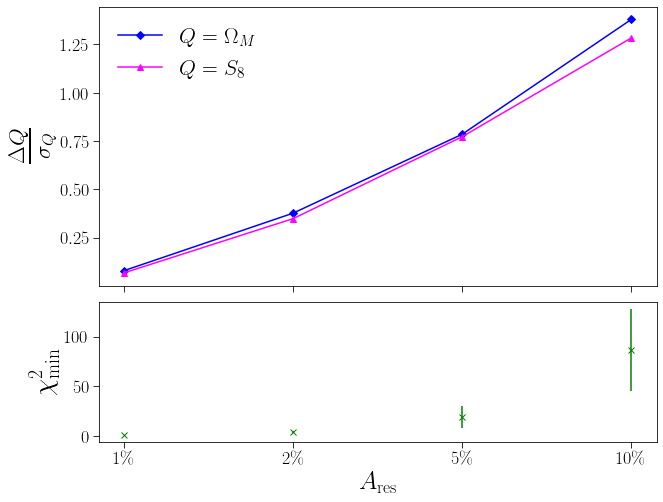

In [5]:
analyse_chains(TATT_fit = False, pert_type = 'AIA_2 gaussian')._plot_chains(cosmo_params = True, vary_param = 'amp')
6.4693552e+01

In [24]:
from scipy.stats import chi2 as chi2f
ndof = 375
chii= 64.693552
pte = 1 -chi2f.cdf(chii + 375, 375)
print(pte)

0.011828180177331116
